# Impact detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install imutils obspy prettytable

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from scipy import signal
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.patches as patches
from matplotlib import cm
#Sismic
from obspy import read
from datetime import datetime, timedelta

%matplotlib inline

#### Data Selection

In [ ]:
data_dir = r'/content/drive/MyDrive/data/lunar/training/data/S12_GradeA/'
cat_directory = '/content/drive/MyDrive/data/lunar/training/catalogs/'

In [ ]:
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [ ]:
row = cat.iloc[75]
test_filename = row.filename

In [ ]:
csv_file = f'{data_dir}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1975-06-26T00:00:00.542000,0.000000,-1.932693e-15
1,1975-06-26T00:00:00.692943,0.150943,-2.417374e-15
2,1975-06-26T00:00:00.843887,0.301887,-2.637054e-15
3,1975-06-26T00:00:00.994830,0.452830,-2.545157e-15
4,1975-06-26T00:00:01.145774,0.603774,-2.229539e-15
...,...,...,...
572402,1975-06-27T00:00:00.843887,86400.301887,-3.982647e-16
572403,1975-06-27T00:00:00.994830,86400.452830,-5.580877e-16
572404,1975-06-27T00:00:01.145774,86400.603774,-6.563002e-16
572405,1975-06-27T00:00:01.296717,86400.754717,-3.281501e-16


In [ ]:
mseed_file = f'{data_dir}{test_filename}.mseed'
st = read(mseed_file)
st

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1975-06-26T00:00:00.542000Z - 1975-06-27T00:00:01.447660Z | 6.6 Hz, 572407 samples

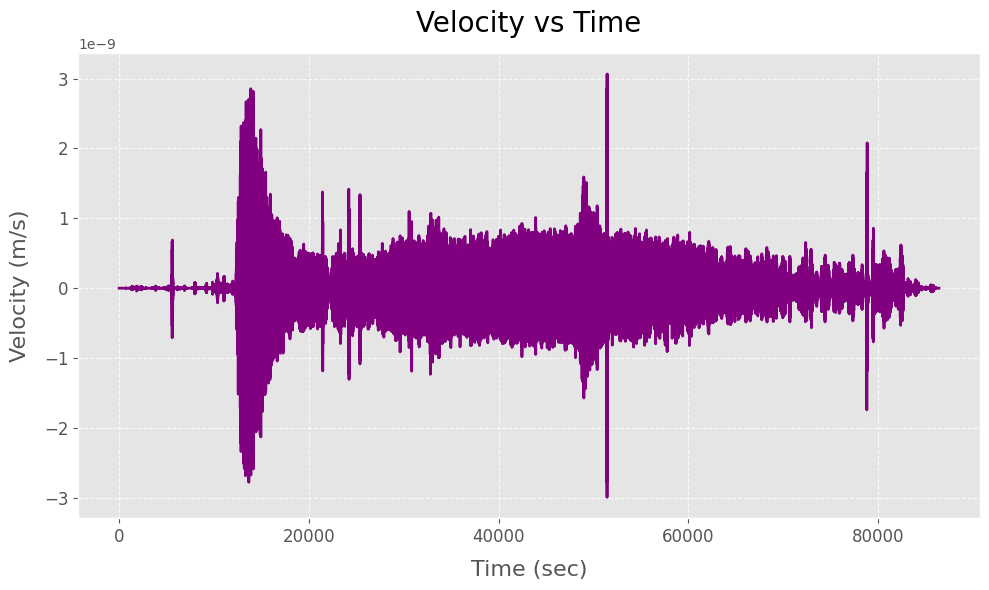

In [ ]:
# Data
t1 = np.array(data_cat['time_rel(sec)'].tolist())
xs = np.array(data_cat['velocity(m/s)'].tolist())
fs = st[0].stats.sampling_rate

plt.figure(figsize=(10, 6))
plt.plot(t1, xs, color='purple', linewidth=2, linestyle='-', label= test_filename)


plt.xlabel('Time (sec)', fontsize=16, labelpad=10)  # Ajustar la etiqueta del eje X
plt.ylabel('Velocity (m/s)', fontsize=16, labelpad=10)  # Ajustar la etiqueta del eje Y

plt.title('Velocity vs Time', fontsize=20, pad=15)

plt.grid(True, linestyle='--', alpha=0.8)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
f, t, sxx = signal.spectrogram(xs, fs)

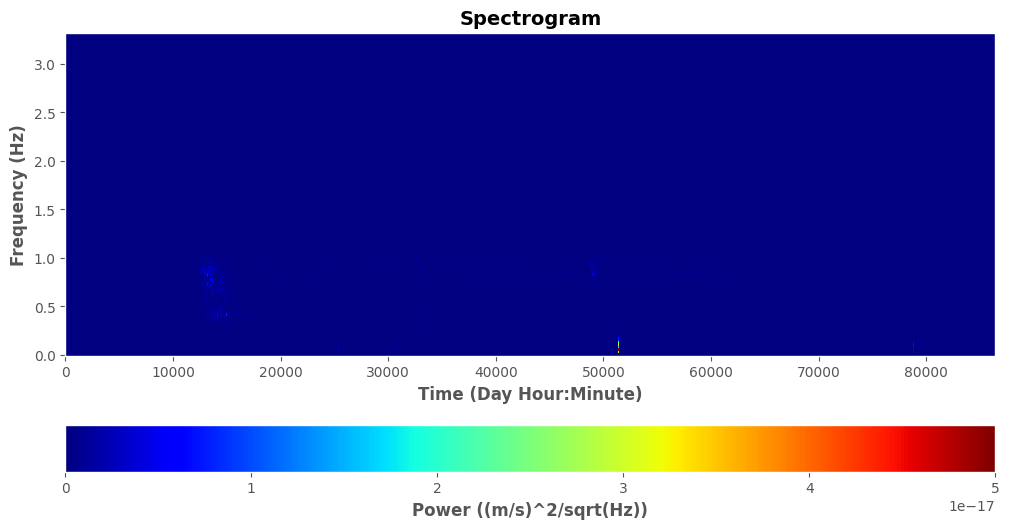

In [ ]:
plt.figure(figsize=(12, 6))

#Spectrogram
vals = plt.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)

plt.xlim([min(t1),max(t1)])
plt.ylabel('Frequency (Hz)', fontsize=12, fontweight='bold')
plt.xlabel('Time (Day Hour:Minute)', fontsize=12, fontweight='bold')

plt.title('Spectrogram', fontsize=14, fontweight='bold')

cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

# Mostrar el gráfico
plt.show()

In [ ]:
data_directory = '/content/drive/MyDrive/data/lunar/training/data/S12_GradeA/'

data = []
labels = []
i = 0
files = os.listdir(data_directory)
recs = [f for f in files if f.endswith('.csv')]
for file in recs:
    # load the image
    df = pd.read_csv(os.path.join(data_directory,file))
    t = df['time_rel(sec)']
    fs = 1/(t[1] - t[0])
    xs = df['velocity(m/s)']
    frequencies, times, spectrogram = signal.spectrogram(xs,fs)
    row = cat.iloc[i]
    d =  row["mq_type"]
    i+=1

    # update the data and labels lists, respectively
    if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=2048:
      data.append(spectrogram[:128,:2048])
      labels.append(d)

#### Data Cloning

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-17HR00_evid00030.csv')
t = df['time_rel(sec)']
fs = 1/(t[1] - t[0])
xs = df['velocity(m/s)']
frequencies, times, spectrogram = signal.spectrogram(xs,fs)
d =  "shallow_mq"

for i in range(20):
  if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=2048:
      data.append(spectrogram[:128,:2048])
  labels.append(d)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-01-15HR00_evid00022.csv')
t = df['time_rel(sec)']
fs = 1/(t[1] - t[0])
xs = df['velocity(m/s)']
frequencies, times, spectrogram = signal.spectrogram(xs,fs)
d =  "deep_mq"

for i in range(20):
  if spectrogram.shape[0] >= 128 and spectrogram.shape[1] >=2048:
      data.append(spectrogram[:128,:2048])
  labels.append(d)

In [ ]:
data = np.array(data)

### Class distribution

In [ ]:
values,count = np.unique(labels,return_counts=True)

In [ ]:
print(values)

['deep_mq' 'impact_mq' 'shallow_mq']


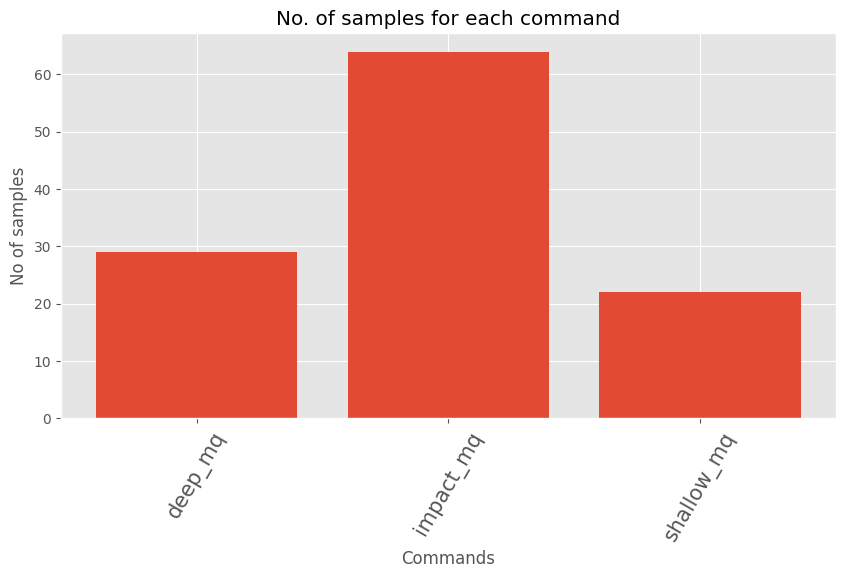

In [ ]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(10,5))
index = np.arange(len(values))
plt.bar(index, count)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of samples', fontsize=12)
plt.xticks(index, values, fontsize=15, rotation=60)
plt.title('No. of samples for each command')
plt.show()

In [ ]:
labels_backup = labels

In [ ]:
# convert the labels to NumPy arrays while scaling the pixel
labels = np.array(labels)

In [ ]:
# perform one-hot encoding on the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ls = le.fit_transform(labels)

In [ ]:
labels_categoricals = to_categorical(ls)

### Data splitting - Train,CV and Test

In [ ]:
# partition the data into training,cross-validation and testing splits using 60%,20% and 20% of data
(trainX, testX, trainY, testY) = train_test_split(data, labels_categoricals,test_size=0.20, stratify=labels_categoricals, random_state=42)
(trainX, cvX, trainY, cvY) = train_test_split(trainX, trainY,test_size=0.25, stratify=trainY, random_state=42)

In [ ]:
print("Train data size : ",trainX.shape)
print("Cross-Validation data size : ",cvX.shape)
print("Test data size : ",testX.shape)

Train data size :  (69, 128, 2048)
Cross-Validation data size :  (23, 128, 2048)
Test data size :  (23, 128, 2048)


In [ ]:
del data
del labels_categoricals

In [ ]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 128, 2048

if K.image_data_format() == 'channels_first':
    trainX = trainX.reshape(trainX.shape[0], 1, img_rows, img_cols)
    testX = testX.reshape(testX.shape[0], 1, img_rows, img_cols)
    cvX = cvX.reshape(cvX.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    trainX = trainX.reshape(trainX.shape[0],img_rows, img_cols,1)
    testX = testX.reshape(testX.shape[0],img_rows, img_cols,1)
    cvX = cvX.reshape(cvX.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows, img_cols,1)

In [ ]:
print("Number of training examples :", trainX.shape[0], "and each image is of shape :",trainX.shape)
print("Number of cross validation examples :", cvX.shape[0], "and each image is of shape :",cvX.shape)
print("Number of testing examples :", testX.shape[0], "and each image is of shape :",testX.shape)

Number of training examples : 69 and each image is of shape : (69, 128, 2048, 1)
Number of cross validation examples : 23 and each image is of shape : (23, 128, 2048, 1)
Number of testing examples : 23 and each image is of shape : (23, 128, 2048, 1)


### VGG16 Model

In [ ]:
#initialize the initial learning rate, number of epochs to train for and batch size
INIT_LR = 1e-2
EPOCHS = 40
batch_size = 64
num_class = len(values)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout,Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

In [ ]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(16, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(64, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(Conv2D(256, kernel_size=(2, 2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 128, 2048, 8)      40        
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 2048, 16)     528       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 1024, 16)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_12 (Ba  (None, 64, 1024, 16)      64        
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 64, 1024, 16)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 1024, 32)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, min_delta=0.0001)
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = model.fit(trainX, trainY, batch_size=batch_size, epochs=EPOCHS, verbose=1, callbacks=[es,mc],validation_data=(cvX, cvY))

Epoch 1/40
2/2 [==============================] - ETA: 0s - loss: 1.1047 - accuracy: 0.2754

2/2 [==============================] - 10s 2s/step - loss: 1.1047 - accuracy: 0.2754 - val_loss: 1.1170 - val_accuracy: 0.2609
Epoch 2/40
2/2 [==============================] - ETA: 0s - loss: 29.5960 - accuracy: 0.1884

2/2 [==============================] - 8s 2s/step - loss: 29.5960 - accuracy: 0.1884 - val_loss: 1.5811 - val_accuracy: 0.2609
Epoch 3/40
2/2 [==============================] - ETA: 0s - loss: 1.9291 - accuracy: 0.6087

2/2 [==============================] - 8s 2s/step - loss: 1.9291 - accuracy: 0.6087 - val_loss: 1.5526 - val_accuracy: 0.2609
Epoch 4/40
2/2 [==============================] - ETA: 0s - loss: 13.1216 - accuracy: 0.5652

2/2 [==============================] - 8s 2s/step - loss: 13.1216 - accuracy: 0.5652 - val_loss: 2.4606 - val_accuracy: 0.2609
Epoch 5/40
2/2 [==============================] - ETA: 0s - loss: 7.5253 - accuracy: 0.2029

2/2 [==============================] - 8s 2s/step - loss: 7.5253 - accuracy: 0.2029 - val_loss: 2.9707 - val_accuracy: 0.2609
Epoch 6/40
2/2 [==============================] - ETA: 0s - loss: 3.7792 - accuracy: 0.4203

2/2 [==============================] - 8s 2s/step - loss: 3.7792 - accuracy: 0.4203 - val_loss: 4.0975 - val_accuracy: 0.2609
Epoch 7/40
2/2 [==============================] - ETA: 0s - loss: 4.2023 - accuracy: 0.5797

2/2 [==============================] - 8s 2s/step - loss: 4.2023 - accuracy: 0.5797 - val_loss: 5.5447 - val_accuracy: 0.2609
Epoch 8/40
2/2 [==============================] - ETA: 0s - loss: 3.2892 - accuracy: 0.3913

2/2 [==============================] - 8s 2s/step - loss: 3.2892 - accuracy: 0.3913 - val_loss: 5.8344 - val_accuracy: 0.2609
Epoch 9/40
2/2 [==============================] - ETA: 0s - loss: 3.9233 - accuracy: 0.2609

2/2 [==============================] - 8s 2s/step - loss: 3.9233 - accuracy: 0.2609 - val_loss: 3.5837 - val_accuracy: 0.2609
Epoch 10/40
2/2 [==============================] - ETA: 0s - loss: 3.1143 - accuracy: 0.3188

2/2 [==============================] - 8s 2s/step - loss: 3.1143 - accuracy: 0.3188 - val_loss: 2.4119 - val_accuracy: 0.2609
Epoch 11/40
2/2 [==============================] - ETA: 0s - loss: 5.1624 - accuracy: 0.2029

2/2 [==============================] - 8s 2s/step - loss: 5.1624 - accuracy: 0.2029 - val_loss: 2.1165 - val_accuracy: 0.2609
Epoch 12/40
2/2 [==============================] - ETA: 0s - loss: 1.9940 - accuracy: 0.5942

2/2 [==============================] - 8s 2s/step - loss: 1.9940 - accuracy: 0.5942 - val_loss: 1.8103 - val_accuracy: 0.2609
Epoch 13/40
2/2 [==============================] - ETA: 0s - loss: 2.0639 - accuracy: 0.5217

2/2 [==============================] - 8s 2s/step - loss: 2.0639 - accuracy: 0.5217 - val_loss: 1.3131 - val_accuracy: 0.2609
Epoch 14/40
2/2 [==============================] - ETA: 0s - loss: 1.2518 - accuracy: 0.5507

2/2 [==============================] - 8s 2s/step - loss: 1.2518 - accuracy: 0.5507 - val_loss: 1.0486 - val_accuracy: 0.2609
Epoch 15/40
2/2 [==============================] - ETA: 0s - loss: 4.2404 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 4.2404 - accuracy: 0.5362 - val_loss: 1.3326 - val_accuracy: 0.2609
Epoch 16/40
2/2 [==============================] - ETA: 0s - loss: 1.3829 - accuracy: 0.4928

2/2 [==============================] - 8s 2s/step - loss: 1.3829 - accuracy: 0.4928 - val_loss: 1.7745 - val_accuracy: 0.2609
Epoch 17/40
2/2 [==============================] - ETA: 0s - loss: 1.6726 - accuracy: 0.2754

2/2 [==============================] - 8s 2s/step - loss: 1.6726 - accuracy: 0.2754 - val_loss: 1.7716 - val_accuracy: 0.2609
Epoch 18/40
2/2 [==============================] - ETA: 0s - loss: 1.3189 - accuracy: 0.4493

2/2 [==============================] - 8s 2s/step - loss: 1.3189 - accuracy: 0.4493 - val_loss: 1.8567 - val_accuracy: 0.2609
Epoch 19/40
2/2 [==============================] - ETA: 0s - loss: 1.0515 - accuracy: 0.5217

2/2 [==============================] - 8s 2s/step - loss: 1.0515 - accuracy: 0.5217 - val_loss: 1.8844 - val_accuracy: 0.2609
Epoch 20/40
2/2 [==============================] - ETA: 0s - loss: 1.2319 - accuracy: 0.4348

2/2 [==============================] - 8s 2s/step - loss: 1.2319 - accuracy: 0.4348 - val_loss: 1.8624 - val_accuracy: 0.2609
Epoch 21/40
2/2 [==============================] - ETA: 0s - loss: 1.3517 - accuracy: 0.5072

2/2 [==============================] - 8s 2s/step - loss: 1.3517 - accuracy: 0.5072 - val_loss: 1.7535 - val_accuracy: 0.2609
Epoch 22/40
2/2 [==============================] - ETA: 0s - loss: 1.1734 - accuracy: 0.5507

2/2 [==============================] - 8s 2s/step - loss: 1.1734 - accuracy: 0.5507 - val_loss: 1.5999 - val_accuracy: 0.2609
Epoch 23/40
2/2 [==============================] - ETA: 0s - loss: 1.0315 - accuracy: 0.5507

2/2 [==============================] - 8s 2s/step - loss: 1.0315 - accuracy: 0.5507 - val_loss: 1.4321 - val_accuracy: 0.2609
Epoch 24/40
2/2 [==============================] - ETA: 0s - loss: 1.0252 - accuracy: 0.5217

2/2 [==============================] - 8s 2s/step - loss: 1.0252 - accuracy: 0.5217 - val_loss: 1.2920 - val_accuracy: 0.2609
Epoch 25/40
2/2 [==============================] - ETA: 0s - loss: 1.0756 - accuracy: 0.5072

2/2 [==============================] - 8s 2s/step - loss: 1.0756 - accuracy: 0.5072 - val_loss: 1.2754 - val_accuracy: 0.2609
Epoch 26/40
2/2 [==============================] - ETA: 0s - loss: 1.0963 - accuracy: 0.4058

2/2 [==============================] - 8s 2s/step - loss: 1.0963 - accuracy: 0.4058 - val_loss: 1.3252 - val_accuracy: 0.2609
Epoch 27/40
2/2 [==============================] - ETA: 0s - loss: 1.0786 - accuracy: 0.4638

2/2 [==============================] - 8s 2s/step - loss: 1.0786 - accuracy: 0.4638 - val_loss: 1.3453 - val_accuracy: 0.2609
Epoch 28/40
2/2 [==============================] - ETA: 0s - loss: 1.0629 - accuracy: 0.3913

2/2 [==============================] - 8s 2s/step - loss: 1.0629 - accuracy: 0.3913 - val_loss: 1.3069 - val_accuracy: 0.2609
Epoch 29/40
2/2 [==============================] - ETA: 0s - loss: 1.0145 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 1.0145 - accuracy: 0.5362 - val_loss: 1.2506 - val_accuracy: 0.2609
Epoch 30/40
2/2 [==============================] - ETA: 0s - loss: 1.1260 - accuracy: 0.5072

2/2 [==============================] - 8s 2s/step - loss: 1.1260 - accuracy: 0.5072 - val_loss: 1.2264 - val_accuracy: 0.2609
Epoch 31/40
2/2 [==============================] - ETA: 0s - loss: 1.1077 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 1.1077 - accuracy: 0.5362 - val_loss: 1.2769 - val_accuracy: 0.2609
Epoch 32/40
2/2 [==============================] - ETA: 0s - loss: 1.1093 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 1.1093 - accuracy: 0.5362 - val_loss: 1.3831 - val_accuracy: 0.2609
Epoch 33/40
2/2 [==============================] - ETA: 0s - loss: 1.2180 - accuracy: 0.4928

2/2 [==============================] - 8s 2s/step - loss: 1.2180 - accuracy: 0.4928 - val_loss: 1.5501 - val_accuracy: 0.2609
Epoch 34/40
2/2 [==============================] - ETA: 0s - loss: 0.9990 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 0.9990 - accuracy: 0.5362 - val_loss: 1.7427 - val_accuracy: 0.2609
Epoch 35/40
2/2 [==============================] - ETA: 0s - loss: 0.9947 - accuracy: 0.5652

2/2 [==============================] - 8s 2s/step - loss: 0.9947 - accuracy: 0.5652 - val_loss: 1.8943 - val_accuracy: 0.2609
Epoch 36/40
2/2 [==============================] - ETA: 0s - loss: 1.0673 - accuracy: 0.5652

2/2 [==============================] - 8s 2s/step - loss: 1.0673 - accuracy: 0.5652 - val_loss: 1.9857 - val_accuracy: 0.2609
Epoch 37/40
2/2 [==============================] - ETA: 0s - loss: 1.0583 - accuracy: 0.5507

2/2 [==============================] - 8s 2s/step - loss: 1.0583 - accuracy: 0.5507 - val_loss: 1.9949 - val_accuracy: 0.2609
Epoch 38/40
2/2 [==============================] - ETA: 0s - loss: 1.0474 - accuracy: 0.5507

2/2 [==============================] - 8s 2s/step - loss: 1.0474 - accuracy: 0.5507 - val_loss: 1.9867 - val_accuracy: 0.2609
Epoch 39/40
2/2 [==============================] - ETA: 0s - loss: 1.0237 - accuracy: 0.5362

2/2 [==============================] - 8s 2s/step - loss: 1.0237 - accuracy: 0.5362 - val_loss: 1.9388 - val_accuracy: 0.2609
Epoch 39: early stopping


# Training

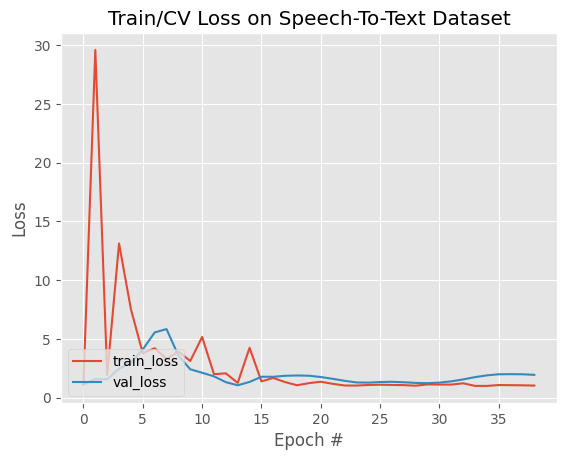

In [ ]:
# plot the training loss
N = 39
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.title("Train/CV Loss on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

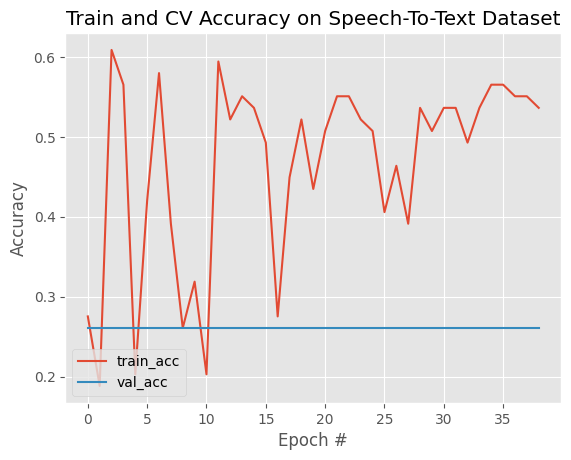

In [ ]:
# plot the training accuracy
N = 39
#plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Train and CV Accuracy on Speech-To-Text Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")

In [ ]:
best_acc = max(history.history["accuracy"])*100
best_val_acc = max(history.history["val_accuracy"])*100

In [ ]:
# make predictions on the testing set
predIdxs = model.predict(testX, batch_size=batch_size)

1/1 [==============================] - 1s 593ms/step


In [ ]:
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:
def plot_Confusion_Matrix(actual_labels,predict_labels,title):
    """This function plot the confusion matrix"""
    # Reference : https://seaborn.pydata.org/generated/seaborn.heatmap.html
    cm = confusion_matrix(actual_labels, predict_labels)
    classNames = values
    cm_data = pd.DataFrame(cm,index = classNames,
                  columns = classNames)
    plt.figure(figsize = (8,8))
    sns.heatmap(cm_data, annot=True,fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    return cm

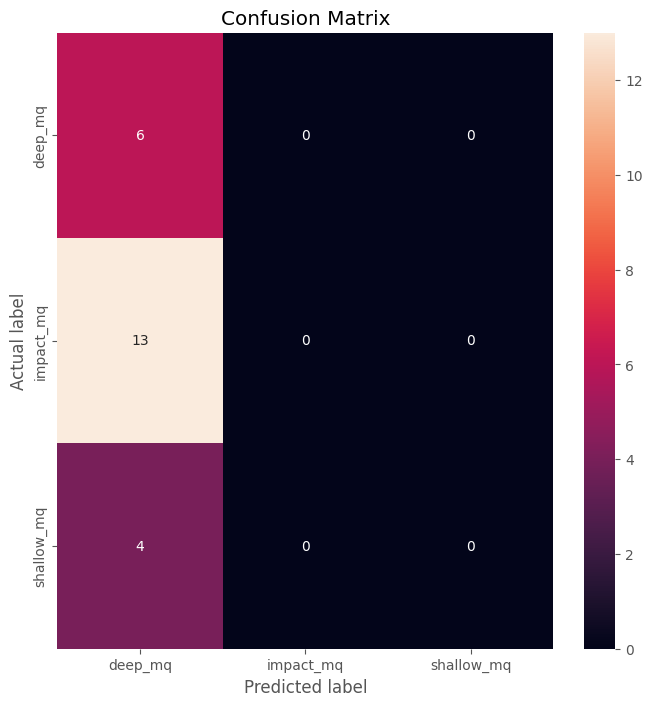

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = plot_Confusion_Matrix(testY.argmax(axis=1), predIdxs,"Confusion Matrix")

In [ ]:
tot = cm[0][0]
for i in range(1,len(values)):
    tot+= cm[i][i]
test = round((tot/testX.shape[0])*100,2)

## Results

In [ ]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Results "
ptable.field_names = ["Mode",'Sample size','Accuracy']
ptable.add_row(["Train",trainX.shape[0], round(best_acc,2)])
ptable.add_row(["Cross-Validation",cvX.shape[0],round(best_val_acc,2)])
ptable.add_row(["Test",testX.shape[0],test])
print(ptable)

+-------------------------------------------+
|               Model Results               |
+------------------+-------------+----------+
|       Mode       | Sample size | Accuracy |
+------------------+-------------+----------+
|      Train       |      69     |  60.87   |
| Cross-Validation |      23     |  26.09   |
|       Test       |      23     |  26.09   |
+------------------+-------------+----------+
